# UCI


In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV




In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [4]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


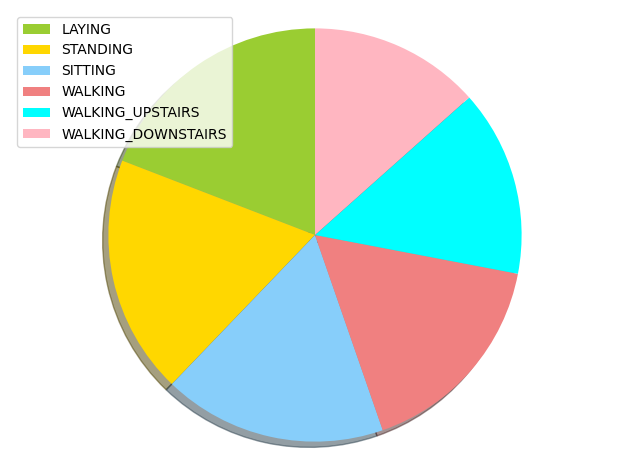

In [5]:
# Visualizing Outcome Distribution 
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [6]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


In [7]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [8]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [9]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.938255432696532 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



In [10]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.96      0.99      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.96      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 0.996872
Testing  set score for SVM: 0.961656


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_scaled, Y_train)
Y_Pred = classifier.predict(X_test_scaled)

In [12]:
Y_Pred

array([2, 2, 2, ..., 5, 5, 5])

In [13]:
from sklearn.metrics import confusion_matrix
from scipy import stats
import numpy as np
Y_Pred = classifier.predict(X_test_scaled)
#taking the most frequent element from the predicted list
y_pred_list = [int(stats.mode(arr)[0]) for arr in Y_pred.tolist()] #convert to list

y_pred_array = np.array(y_pred_list)  #convert to 1D with same shape of y_test

print(y_pred_array.shape)

print(y_pred_array)

matrix = confusion_matrix(Y_test_label,Y_pred_label)

C:\Users\HP\AppData\Local\Temp\ipykernel_3980\3309253602.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_list = [int(stats.mode(arr)[0]) for arr in Y_pred.tolist()] #convert to list


(2947,)
[2 2 2 ... 5 5 5]


In [14]:
x_train = train.drop("Activity", axis = 1).values
y_train = train["Activity"].values

In [15]:
x_test = test.drop("Activity", axis = 1).values
y_test = test["Activity"].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
kernal_evals = dict()
def evaluate_classification(model, name, x_train, x_test, y_train, y_test):
    actual = y_test
    predicted = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(8,8))
    ax.grid(False)
    cm_display.plot(ax=ax)

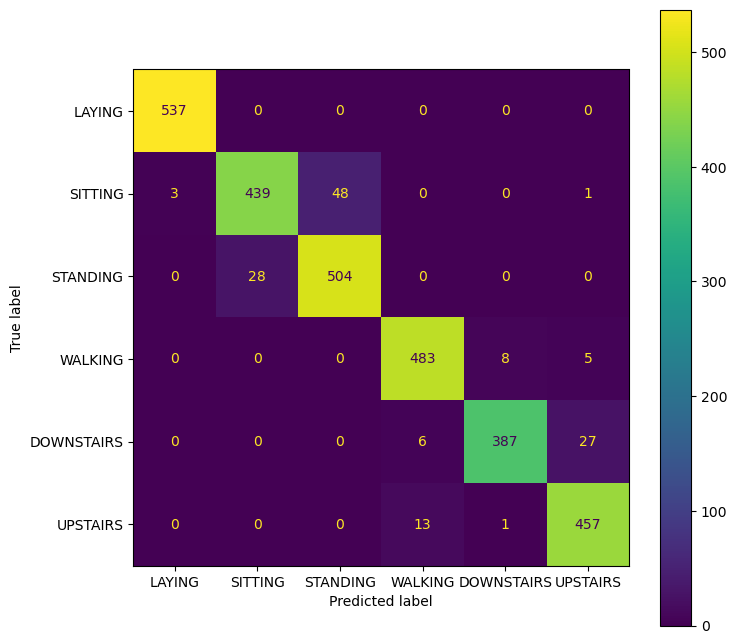

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
lr = SVC().fit(x_train, y_train)
evaluate_classification(lr, "svm", x_train, x_test, y_train, y_test)

# HAR

In [19]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [20]:
xtrain=pd.read_table('X_train.txt',delim_whitespace=True,header=None)

In [21]:
xtest=pd.read_table('X_test.txt',delim_whitespace=True,header=None)

In [22]:
ytrain=pd.read_table('y_train.txt',header=None)

In [23]:
ytest=pd.read_table('y_test.txt',header=None)

In [24]:
classifier=svm.SVC()

In [25]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 10]}]

In [26]:
model=GridSearchCV(classifier,parameters,n_jobs=-1,cv=4,verbose=4)

In [27]:
import numpy as np
xtrain = np.asarray(xtrain)
ytrain = np.asarray(ytrain)


In [28]:
model.fit(xtrain,ytrain.ravel().T)


Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 10], 'kernel': ['linear']}],
             verbose=4)

In [29]:
from sklearn.metrics import accuracy_score
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)





In [30]:
ypred

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [31]:
print ('Best Parameters: '+ str(model.best_params_))
print ('Accuracy Score: '+ str(accuracy*100) + ' %')

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy Score: 96.57278588394978 %


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
ytest

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(confusion_matrix(ytest, ypred))

[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


In [36]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       0.99      0.97      0.98       420
           4       0.97      0.89      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.97      2947



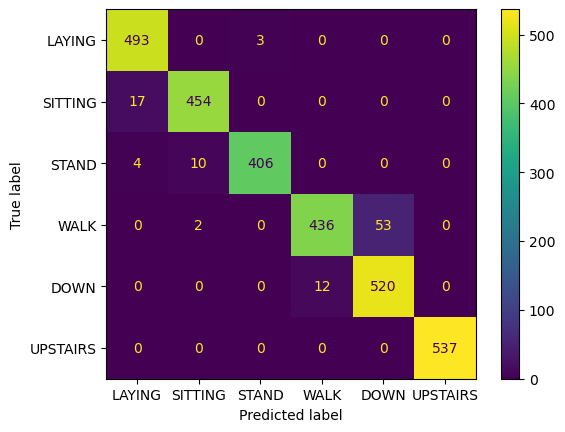

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import default_rng

conf_matrix =confusion_matrix(ytest, ypred)
vis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['LAYING','SITTING', 'STAND', 'WALK', 'DOWN',
       'UPSTAIRS'])
vis.plot()

# cancer dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# built in breast cancer dataset from Scikit Learn

In [40]:
from sklearn.datasets import load_breast_cancer

In [41]:
cancer = load_breast_cancer()

In [42]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# set up our data frame

In [43]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [44]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [46]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [48]:
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [49]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [50]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X= df_feat
y= cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC()

In [55]:
model.fit(X_train,y_train)

SVC()

In [56]:
predictions = model.predict(X_test)

In [57]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [58]:
from sklearn.metrics import classification_report,confusion_matrix


In [59]:
cm=confusion_matrix(y_test,predictions)
print("Confusion Matrix is:\n",cm)


Confusion Matrix is:
 [[ 56  10]
 [  3 102]]


In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



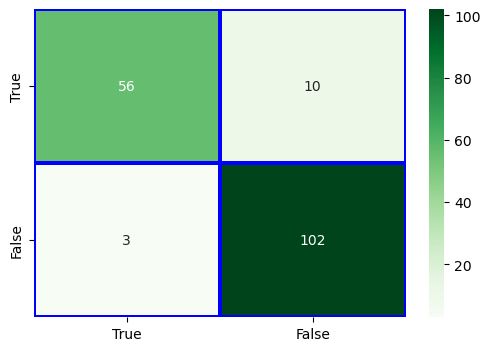

In [62]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue",
linewidths=1.5)
plt.show()

In [63]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [66]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [67]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [68]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [69]:
grid_predictions = grid.predict(X_test)

In [70]:

cm=confusion_matrix(y_test,grid_predictions)
print("Confusion Matrix is:\n",cm)


Confusion Matrix is:
 [[ 59   7]
 [  4 101]]


In [71]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



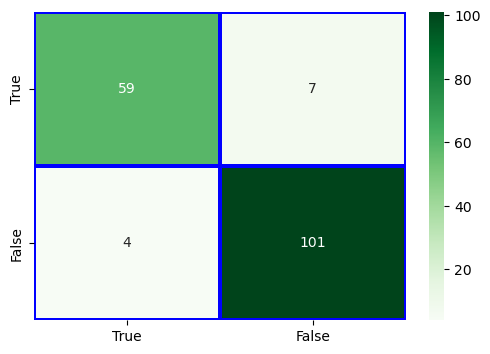

In [72]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue",
linewidths=1.5)
plt.show()